In [74]:
# COPY THIS
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/Semesters/Semester 8/data102')

Mounted at /content/drive


In [75]:
#@title Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from scipy import stats

In [ ]:
#@title Installing sodapy for loading large datasets
!pip install sodapy
from sodapy import Socrata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1


#Initial Dataset Probing

#U.S. Chronic Disease Indicators (CDI)

In [15]:
#@title Read data: cdi
cdi = pd.read_csv('data/cdi.csv')

<ipython-input-15-4d62437e3a99>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  cdi = pd.read_csv('data/cdi.csv')


## Dataset Description: CDC's Division of Population Health provides cross-cutting set of 
124 indicators that were developed by consensus and that allows states and 
territories and large metropolitan areas to uniformly define, collect, and 
report chronic disease data that are important to public health practice and 
available for states, territories and large metropolitan areas

In [ ]:
cdi_topics = cdi["Topic"].unique()
cdi_shape = cdi.shape
cdi_cols = cdi.columns

In [ ]:
StratificationCategoryID1

In [ ]:
cdi[cdi["Topic"] == "Overarching Conditions"]

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
461451,2001,2001,IN,Indiana,"NVSS, Mortality",Overarching Conditions,Life expectancy at birth,NaN,Years,Number,...,18,OVC,OVC4_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
462162,2015,2015,AR,Arkansas,NVSS,Overarching Conditions,Premature mortality among adults aged 45-64 years,NaN,NaN,Number,...,5,OVC,OVC5_0,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
462254,2018,2018,NM,New Mexico,"NVSS, Mortality",Overarching Conditions,Life expectancy at birth,NaN,Years,Number,...,35,OVC,OVC4_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
462301,2011,2011,CO,Colorado,ACS 1-Year Estimates,Overarching Conditions,Poverty,NaN,%,Crude Prevalence,...,8,OVC,OVC3_1,CRDPREV,RACE,WHT,NaN,NaN,NaN,NaN
462758,2015,2015,ID,Idaho,ACS 1-Year Estimates,Overarching Conditions,Poverty,NaN,%,Crude Prevalence,...,16,OVC,OVC3_1,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185429,2020,2020,WY,Wyoming,BRFSS,Overarching Conditions,Recent activity limitation among adults aged >...,NaN,Number,Age-adjusted Mean,...,56,OVC,OVC7_2,AGEADJMEAN,OVERALL,OVR,NaN,NaN,NaN,NaN
1185474,2020,2020,WY,Wyoming,BRFSS,Overarching Conditions,Fair or poor self-rated health status among ad...,NaN,%,Crude Prevalence,...,56,OVC,OVC6_1,CRDPREV,RACE,OTH,NaN,NaN,NaN,NaN
1185478,2020,2020,WY,Wyoming,BRFSS,Overarching Conditions,Current lack of health insurance among adults ...,NaN,%,Age-adjusted Prevalence,...,56,OVC,OVC1_1,AGEADJPREV,RACE,BLK,NaN,NaN,NaN,NaN
1185497,2020,2020,WY,Wyoming,BRFSS,Overarching Conditions,Self-rated health status among women aged 18-4...,NaN,%,Crude Prevalence,...,56,OVC,OVC6_2,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN


In [ ]:
#@title Types of questions in 'Question' column for each topic

cdi_q_topics = cdi.groupby("Topic")["Question"].unique()
for topic in cdi_topics:
  print(topic, ": ")
  for question in cdi_q_topics[topic]:
    print("   ", question)

Asthma : 
    Hospitalizations for asthma
    Asthma mortality rate
    Emergency department visit rate for asthma
    Asthma prevalence among women aged 18-44 years
    Current asthma prevalence among adults aged >= 18 years
    Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma
    Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma
    Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma
    Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma
Cancer : 
    Cancer of the oral cavity and pharynx, mortality
    Cancer of the prostate, mortality
    Invasive cancer (all sites combined), mortality
    Cancer of the female breast, mortality
    Cancer of the female cervix, mortality
    Cancer of the colon and rectum (colorectal), mortality
    Cancer of the lung and bronchus, mortality
    Invasive melanoma, incidence
    Melanoma, mortality
    Invasi

## Possible Columns and Questions
**Asthma:** ["Hospitalizations for asthma", "Emergency department visit rate for asthma", "Current asthma prevalence among adults aged >= 18 years"]

**Cancer:** ["Cancer of the lung and bronchus, incidence" , ]

**Chronic Obstructive Pulmonary Disease:** ["Prevalence of chronic obstructive pulmonary disease among adults >= 18", "Prevalence of chronic obstructive pulmonary disease among adults >= 45 years"]

- do higher pm levels affect adults > 18 more or >45 more
(causal inference - but there could be confounding variables)

# Daily Census Tract-Level PM2.5 Concentrations, 2011-2014

## Read data: pm2.5

### Dataset Description: 
This dataset provides modeled predictions of PM2.5 levels from the EPA's Downscaler model. Data are at the census tract level for 2011-2014. pm25 divided into dfs by year

In [ ]:
client = Socrata("data.cdc.gov", None)

#year queries - aggregate by day
query2014 = "SELECT date, AVG(ds_pm_pred) WHERE year='2014' GROUP BY date LIMIT 365 "
query2013 = "SELECT date, AVG(ds_pm_pred) WHERE year='2013' GROUP BY date LIMIT 365 "
query2012 = "SELECT date, AVG(ds_pm_pred) WHERE year='2012' GROUP BY date LIMIT 366 "
query2011 = "SELECT date, AVG(ds_pm_pred) WHERE year='2011' GROUP BY date LIMIT 365 "
# arguments to .get are SQL-style: see https://dev.socrata.com/docs/queries/

In [ ]:
#2014
results2014 = client.get("fcqm-xrf4", query= query2014)
pm2014 = pd.DataFrame.from_records(results2014)
pm2014

,date,AVG_ds_pm_pred
0,01APR2014,7.7537349999308274
1,01AUG2014,13.2792515971943611
2,01DEC2014,8.5755338549866497
3,01FEB2014,14.0431393532365840
4,01JAN2014,18.2290441294633593
...,...,...
360,31JAN2014,12.6762379771177179
361,31JUL2014,11.5494138639790822
362,31MAR2014,7.4408511597471051
363,31MAY2014,9.0499658907350276


In [ ]:
#2013
results2013 = client.get("fcqm-xrf4", query= query2013)
pm2013 = pd.DataFrame.from_records(results2013)
pm2013

,date,AVG_ds_pm_pred
0,01APR2013,6.2612480431083381
1,01AUG2013,9.6180239420057275
2,01DEC2013,15.3211495352987563
3,01FEB2013,7.1819298770111921
4,01JAN2013,12.7210608856854309
...,...,...
360,31JAN2013,6.0011068710485176
361,31JUL2013,10.6171679537373933
362,31MAR2013,9.6727776171437267
363,31MAY2013,8.9891953830084529


In [ ]:
#2012-leap year
results2012 = client.get("fcqm-xrf4", query= query2012)
pm2012 = pd.DataFrame.from_records(results2012)
pm2012

,date,AVG_ds_pm_pred
0,01APR2012,10.7582436381998534
1,01AUG2012,10.0582815852966811
2,01DEC2012,13.8310854009933179
3,01FEB2012,11.6899845731361454
4,01JAN2012,11.1504838578918971
...,...,...
361,31JAN2012,9.6617873444655036
362,31JUL2012,9.5620479877702918
363,31MAR2012,9.1990736964431471
364,31MAY2012,8.3275487648548068


In [ ]:
#2011
results2011 = client.get("fcqm-xrf4", query= query2011)
pm2011 = pd.DataFrame.from_records(results2011)
pm2011

,date,AVG_ds_pm_pred
0,01APR2011,10.0384188533126738
1,01AUG2011,11.7210691592767317
2,01DEC2011,8.7082993572070888
3,01FEB2011,10.8834107739164119
4,01JAN2011,14.0473418859206176
...,...,...
360,31JAN2011,11.2540195343995130
361,31JUL2011,10.0449955374984436
362,31MAR2011,9.6644030600279457
363,31MAY2011,11.9555621794474496


## Date and Type Manipulation

In [ ]:

#2014
pm2014["month"] = pm2014["date"].str.extract(r'([A-Z]+)')
pm2014["month"] = pm2014["month"].map({"JAN":1, "FEB":2, "MAR":3, "APR":4, "MAY":5, "JUN":6, "JUL":7, "AUG":8, "SEP":9, "OCT":10, "NOV":11, "DEC":12})
pm2014["day"] = pm2014["date"].str.extract(r'(\d+)[A-Z]')
pm2014["year"] = pm2014["date"].str.extract(r'[A-Z](\d+)')
pm2014 = pm2014.astype({"day": int, "year":int})
pm2014["AVG_ds_pm_pred"] = pd.to_numeric(pm2014["AVG_ds_pm_pred"]).astype(int)
pm2014["date2"] = pd.to_datetime(pm2014["year"]*10000+pm2014["month"]*100+pm2014["day"],format='%Y%m%d')
pm2014 = pm2014.sort_values("date2")

#2013
pm2013["month"] = pm2013["date"].str.extract(r'([A-Z]+)')
pm2013["month"] = pm2013["month"].map({"JAN":1, "FEB":2, "MAR":3, "APR":4, "MAY":5, "JUN":6, "JUL":7, "AUG":8, "SEP":9, "OCT":10, "NOV":11, "DEC":12})
pm2013["day"] = pm2013["date"].str.extract(r'(\d+)[A-Z]')
pm2013["year"] = pm2013["date"].str.extract(r'[A-Z](\d+)')
pm2013 = pm2013.astype({"day": int, "year":int})
pm2013["AVG_ds_pm_pred"] = pd.to_numeric(pm2013["AVG_ds_pm_pred"]).astype(int)
pm2013["date2"] = pd.to_datetime(pm2013["year"]*10000+pm2013["month"]*100+pm2013["day"],format='%Y%m%d')
pm2013 = pm2013.sort_values("date2")

#2012
pm2012["month"] = pm2012["date"].str.extract(r'([A-Z]+)')
pm2012["month"] = pm2012["month"].map({"JAN":1, "FEB":2, "MAR":3, "APR":4, "MAY":5, "JUN":6, "JUL":7, "AUG":8, "SEP":9, "OCT":10, "NOV":11, "DEC":12})
pm2012["day"] = pm2012["date"].str.extract(r'(\d+)[A-Z]')
pm2012["year"] = pm2012["date"].str.extract(r'[A-Z](\d+)')
pm2012 = pm2012.astype({"day": int, "year":int})
pm2012["AVG_ds_pm_pred"] = pd.to_numeric(pm2012["AVG_ds_pm_pred"]).astype(int)
pm2012["date2"] = pd.to_datetime(pm2012["year"]*10000+pm2012["month"]*100+pm2012["day"],format='%Y%m%d')
pm2012 = pm2012.sort_values("date2")

#2011
pm2011["month"] = pm2011["date"].str.extract(r'([A-Z]+)')
pm2011["month"] = pm2011["month"].map({"JAN":1, "FEB":2, "MAR":3, "APR":4, "MAY":5, "JUN":6, "JUL":7, "AUG":8, "SEP":9, "OCT":10, "NOV":11, "DEC":12})
pm2011["day"] = pm2011["date"].str.extract(r'(\d+)[A-Z]')
pm2011["year"] = pm2011["date"].str.extract(r'[A-Z](\d+)')
pm2011 = pm2011.astype({"day": int, "year":int})
pm2011["AVG_ds_pm_pred"] = pd.to_numeric(pm2011["AVG_ds_pm_pred"]).astype(int)
pm2011["date2"] = pd.to_datetime(pm2011["year"]*10000+pm2011["month"]*100+pm2011["day"],format='%Y%m%d')
pm2011 = pm2011.sort_values("date2")

#agg
monthly_pmavg_2014 = pm2014.groupby("month").mean()[["AVG_ds_pm_pred"]]
monthly_pmavg_2013 = pm2013.groupby("month").mean()[["AVG_ds_pm_pred"]]
monthly_pmavg_2012 = pm2012.groupby("month").mean()[["AVG_ds_pm_pred"]]
monthly_pmavg_2011 = pm2011.groupby("month").mean()[["AVG_ds_pm_pred"]]

## Plot For Each Year

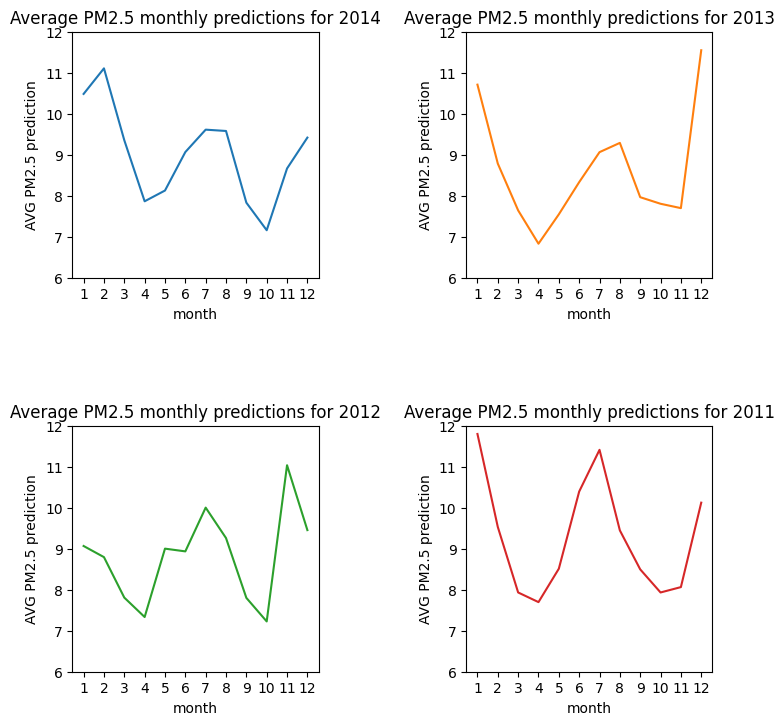

In [ ]:
#2014 graph
x1 = monthly_pmavg_2014.index
y1 = monthly_pmavg_2014["AVG_ds_pm_pred"]

#2013 graph
x2 = monthly_pmavg_2013.index
y2 = monthly_pmavg_2013["AVG_ds_pm_pred"]

#2012 graph
x3 = monthly_pmavg_2012.index
y3 = monthly_pmavg_2012["AVG_ds_pm_pred"]

#2011 graph
x4 = monthly_pmavg_2011.index
y4 = monthly_pmavg_2011["AVG_ds_pm_pred"]

#plot
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x1, y1)
axs[0, 0].set_title("Average PM2.5 monthly predictions for 2014")
axs[0, 1].plot(x2, y2, 'tab:orange')
axs[0, 1].set_title("Average PM2.5 monthly predictions for 2013")
axs[1, 0].plot(x3, y3, 'tab:green')
axs[1, 0].set_title("Average PM2.5 monthly predictions for 2012")
axs[1, 1].plot(x4, y4, 'tab:red')
axs[1, 1].set_title("Average PM2.5 monthly predictions for 2011")

    
# set x ticks and labels
for ax in axs.flat:
    ax.set(xlabel='month', ylabel='AVG PM2.5 prediction')
    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_yticks(np.arange(6, 13, 1))

#fix padding
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.6)
fig.set_figheight(8)
fig.set_figwidth(8)

# Daily Census Tract-Level Ozone Concentrations, 2011-2014

In [ ]:
#size issue - so taken from janise
#ozone only from year 2014
client = Socrata("data.cdc.gov", None)
results = client.get(
  "372p-dx3h",
  where="`date` = '01JAN2014'",
  limit=100000
)

ozone = pd.DataFrame.from_records(results)

#shape
shape = ozone.shape
shape

(72283, 9)

In [ ]:
#Possible Research Questions
#effect of ozone + pm levels over time on incidence of pul & their respective effect on pul
#versus another disease - asthma

In [76]:
#read diabetes data for eda
diabetes = pd.read_csv('data/categorical_diabetes.csv')

In [77]:
#drop unecessary columns
diabetes = diabetes.drop(columns=["male", "female", "State"])

#no data rows + drop guam, puerto rico - only 50 states
diabetes = diabetes.drop(index=[51, 52, 53, 54])

# convert to float
diabetes = diabetes.astype({'18-44':'float','45-64':'float', '65-74':'float', '75+':'float'})
diabetes.head()

,18-44,45-64,65-74,75+
0,4.8,17.8,24.3,21.0
1,1.8,10.3,21.3,21.0
2,2.8,14.0,21.8,18.7
3,3.9,17.9,24.7,22.8
4,2.9,15.4,21.5,22.5


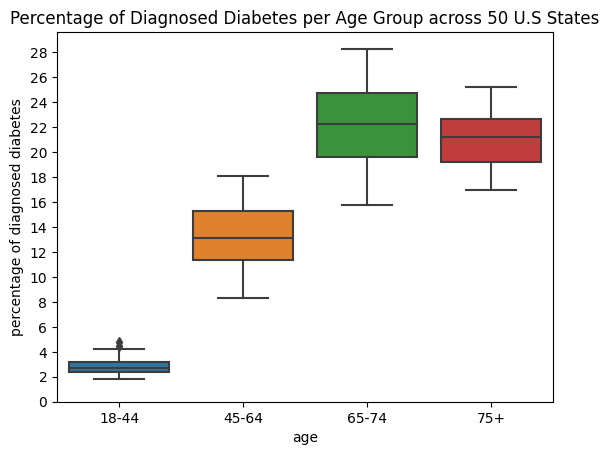

In [72]:
#plot Diabetes Prevalence per Age Group across 50 U.S States
sns.boxplot(x="variable", y="value", data=pd.melt(diabetes));
plt.title("Percentage of Diagnosed Diabetes per Age Group across 50 U.S States");
plt.xlabel("age");
plt.ylabel("percentage of diagnosed diabetes");

plt.yticks(np.arange(0, 30, step=2));

In [62]:
#stack overflow example of melt
# import numpy as np; np.random.seed(42)
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['A','B','C','D'])
# sns.boxplot(x="variable", y="value", data=pd.melt(df))

# plt.show()